# Reading Jungfrau files

In [1]:
#add the dev version of aare
import sys; sys.path.append('/home/l_msdetect/erik/aare/build')
from helpers import nb_aare_version
nb_aare_version()

from aare import RawMasterFile, File, RawFile, RawSubFile, DetectorType

#Our normal python imports
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

base = Path('/mnt/sls_det_storage/matterhorn_data/aare_test_data/')

Example run on: **2025-04-30 14:29** with aare: **dev**

## Single module split over several files

img.shape=(512, 1024)
data.shape=(10, 512, 1024)


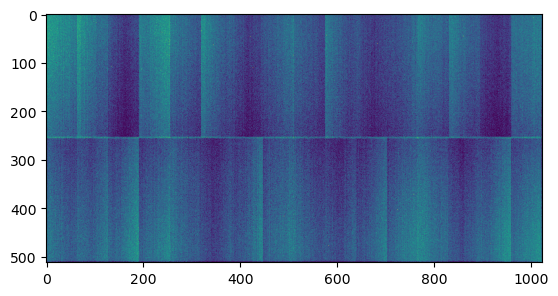

In [2]:
# For demo the subfiles contain 3,3,3,1 frames for a total of 10 frames
f = File(base / 'ci/aare_test_data/jungfrau/jungfrau_single_master_0.json')

#read one frame
img = f.read_frame()
print(f'{img.shape=}')

# go back to the beginning 
f.seek(0)
data = f.read_n(10)
print(f'{data.shape=}')

fig, ax = plt.subplots()
im = ax.imshow(data[5])
im.set_clim(2500,4000)

## Single module with ROI

img.shape=(258, 258)


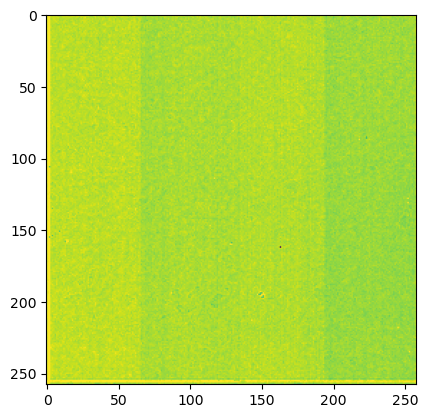

In [3]:
# For data where a ROI was recorded the image size automatically adapts
f = File(base / 'Jungfrau10/Jungfrau_ROI/FullDataset/jungfrau_roi_pedestal_master_0.json')
img = f.read_frame()
print(f'{img.shape=}')


fig, ax = plt.subplots()
im = ax.imshow(img)
im.set_clim(2500,8000)

## Two modules side by side with ROI

img.shape=(81, 1526)


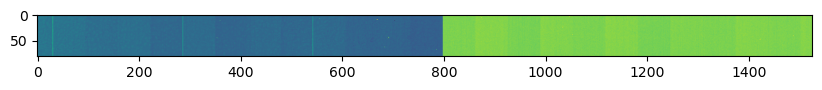

In [4]:
fname = base / 'Jungfrau10/Jungfrau_DoubleModule_1UDP_ROI/SideBySide/241019_JF_12keV_Si_FF_GaAs_FF_7p88mmFilter_PedestalStart_ZPos_5.5_master_0.json'

f = File(fname)
img = f.read_frame()
print(f'{img.shape=}')
fig, ax = plt.subplots(figsize = (10,3))
im = ax.imshow(img)
im.set_clim(2500,12000)

## Read information form the file

In [5]:
print(f'Total frames: {f.total_frames}')
print(f'Image size: {f.rows}x{f.cols}')
print(f'Bitdepth: {f.bitdepth}')


Total frames: 10000
Image size: 81x1526
Bitdepth: 16


## Two modules stacked

img.shape=(651, 844)
frame nr: [2784268 2784268]
Total frames: 10000
Image size: 651x844


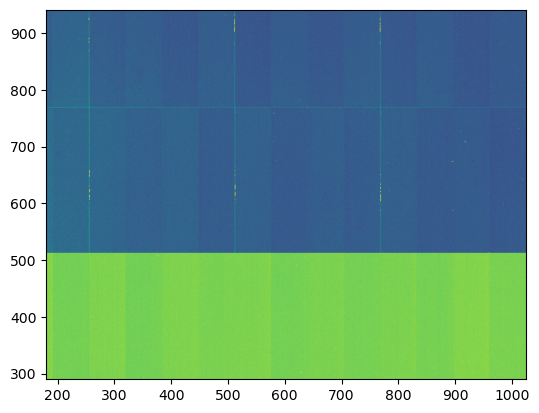

In [6]:
fname = base / 'Jungfrau10/Jungfrau_DoubleModule_1UDP_ROI/Stacked/241024_JF10_m450_m367_KnifeEdge_TestBesom_9keV_750umFilter_PedestalStart_ZPos_-6_master_0.json'

f = RawFile(fname)
h, img = f.read_frame()
print(f'{img.shape=}')
print(f'frame nr: {h["frameNumber"]}')
fig, ax = plt.subplots()
im = ax.imshow(img, extent = tuple(f.master.roi), origin = 'lower') #use the roi for axis labels
im.set_clim(2500,12000)

print(f'Total frames: {f.total_frames}')
print(f'Image size: {f.rows}x{f.cols}')

## Read multiple frames

In [7]:
headers, data = f.read_n(1000)

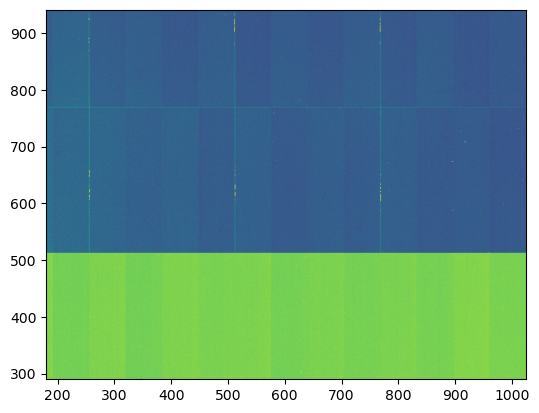

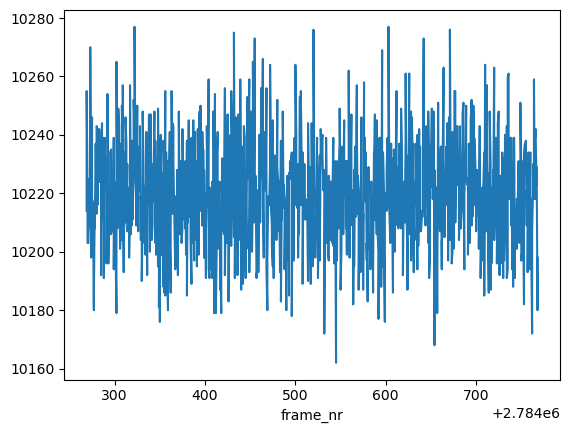

In [8]:
fig, ax = plt.subplots()
im = ax.imshow(data[72], extent = tuple(f.master.roi), origin = 'lower') #use the roi for axis labels
im.set_clim(2500,12000)


frame_nr = headers[0,:]['frameNumber']
fig, ax = plt.subplots()
ax.plot(frame_nr, data[:, 100,100])
ax.set_xlabel('frame_nr');

In [9]:
# For demo the subfiles contain 3,3,3,1 frames for a total of 10 frames
f = File(base / 'ci/aare_test_data/jungfrau/jungfrau_single_master_0.json')

for i in range(3):
    try:
        data = f.read_n(7)
        print(f'{i}: {data.shape=}')
    except RuntimeError as e:
        print(f'{i}: {e}')

0: data.shape=(7, 512, 1024)
1: data.shape=(3, 512, 1024)
2: No frames left in file
